1.  Опишите  методы  выделения  краёв  и  границ  в  изображениях,  включая 
использование градиентов и фильтров, таких как Робертса, Превитт, Собель, и 
Scharr. Как дифференцирование и свёртка применяются для выявления важных 
границ и структур в изображениях? Объясните, как изменение размера ядра 
фильтра влияет на результаты выделения краёв. 
2.  Разработайте алгоритм на Python для коррекции цвета изображения, переводя 
его в пространство CIE XYZ и обратно.

Выделение краёв — это процесс обнаружения резких изменений яркости или цвета в изображении, которые обычно соответствуют границам объектов. Основные методы основаны на вычислении градиентов и использовании свёрточных фильтров.

Дифференцирование: Градиенты вычисляются как производные яркости по направлениям x и y.
Свёртка: Фильтры (например, Собель) применяются через операцию свёртки, где ядро накладывается на изображение для вычисления градиентов.

Влияние размера ядра фильтра:

Маленькое ядро (например, 2x2 или 3x3):
- Выделяет мелкие детали и тонкие края.
- Более чувствительно к шуму.


Большое ядро (например, 5x5 или 7x7):
- Лучше подавляет шум.
- Выделяет более грубые и широкие края.
- Может пропускать мелкие детали.

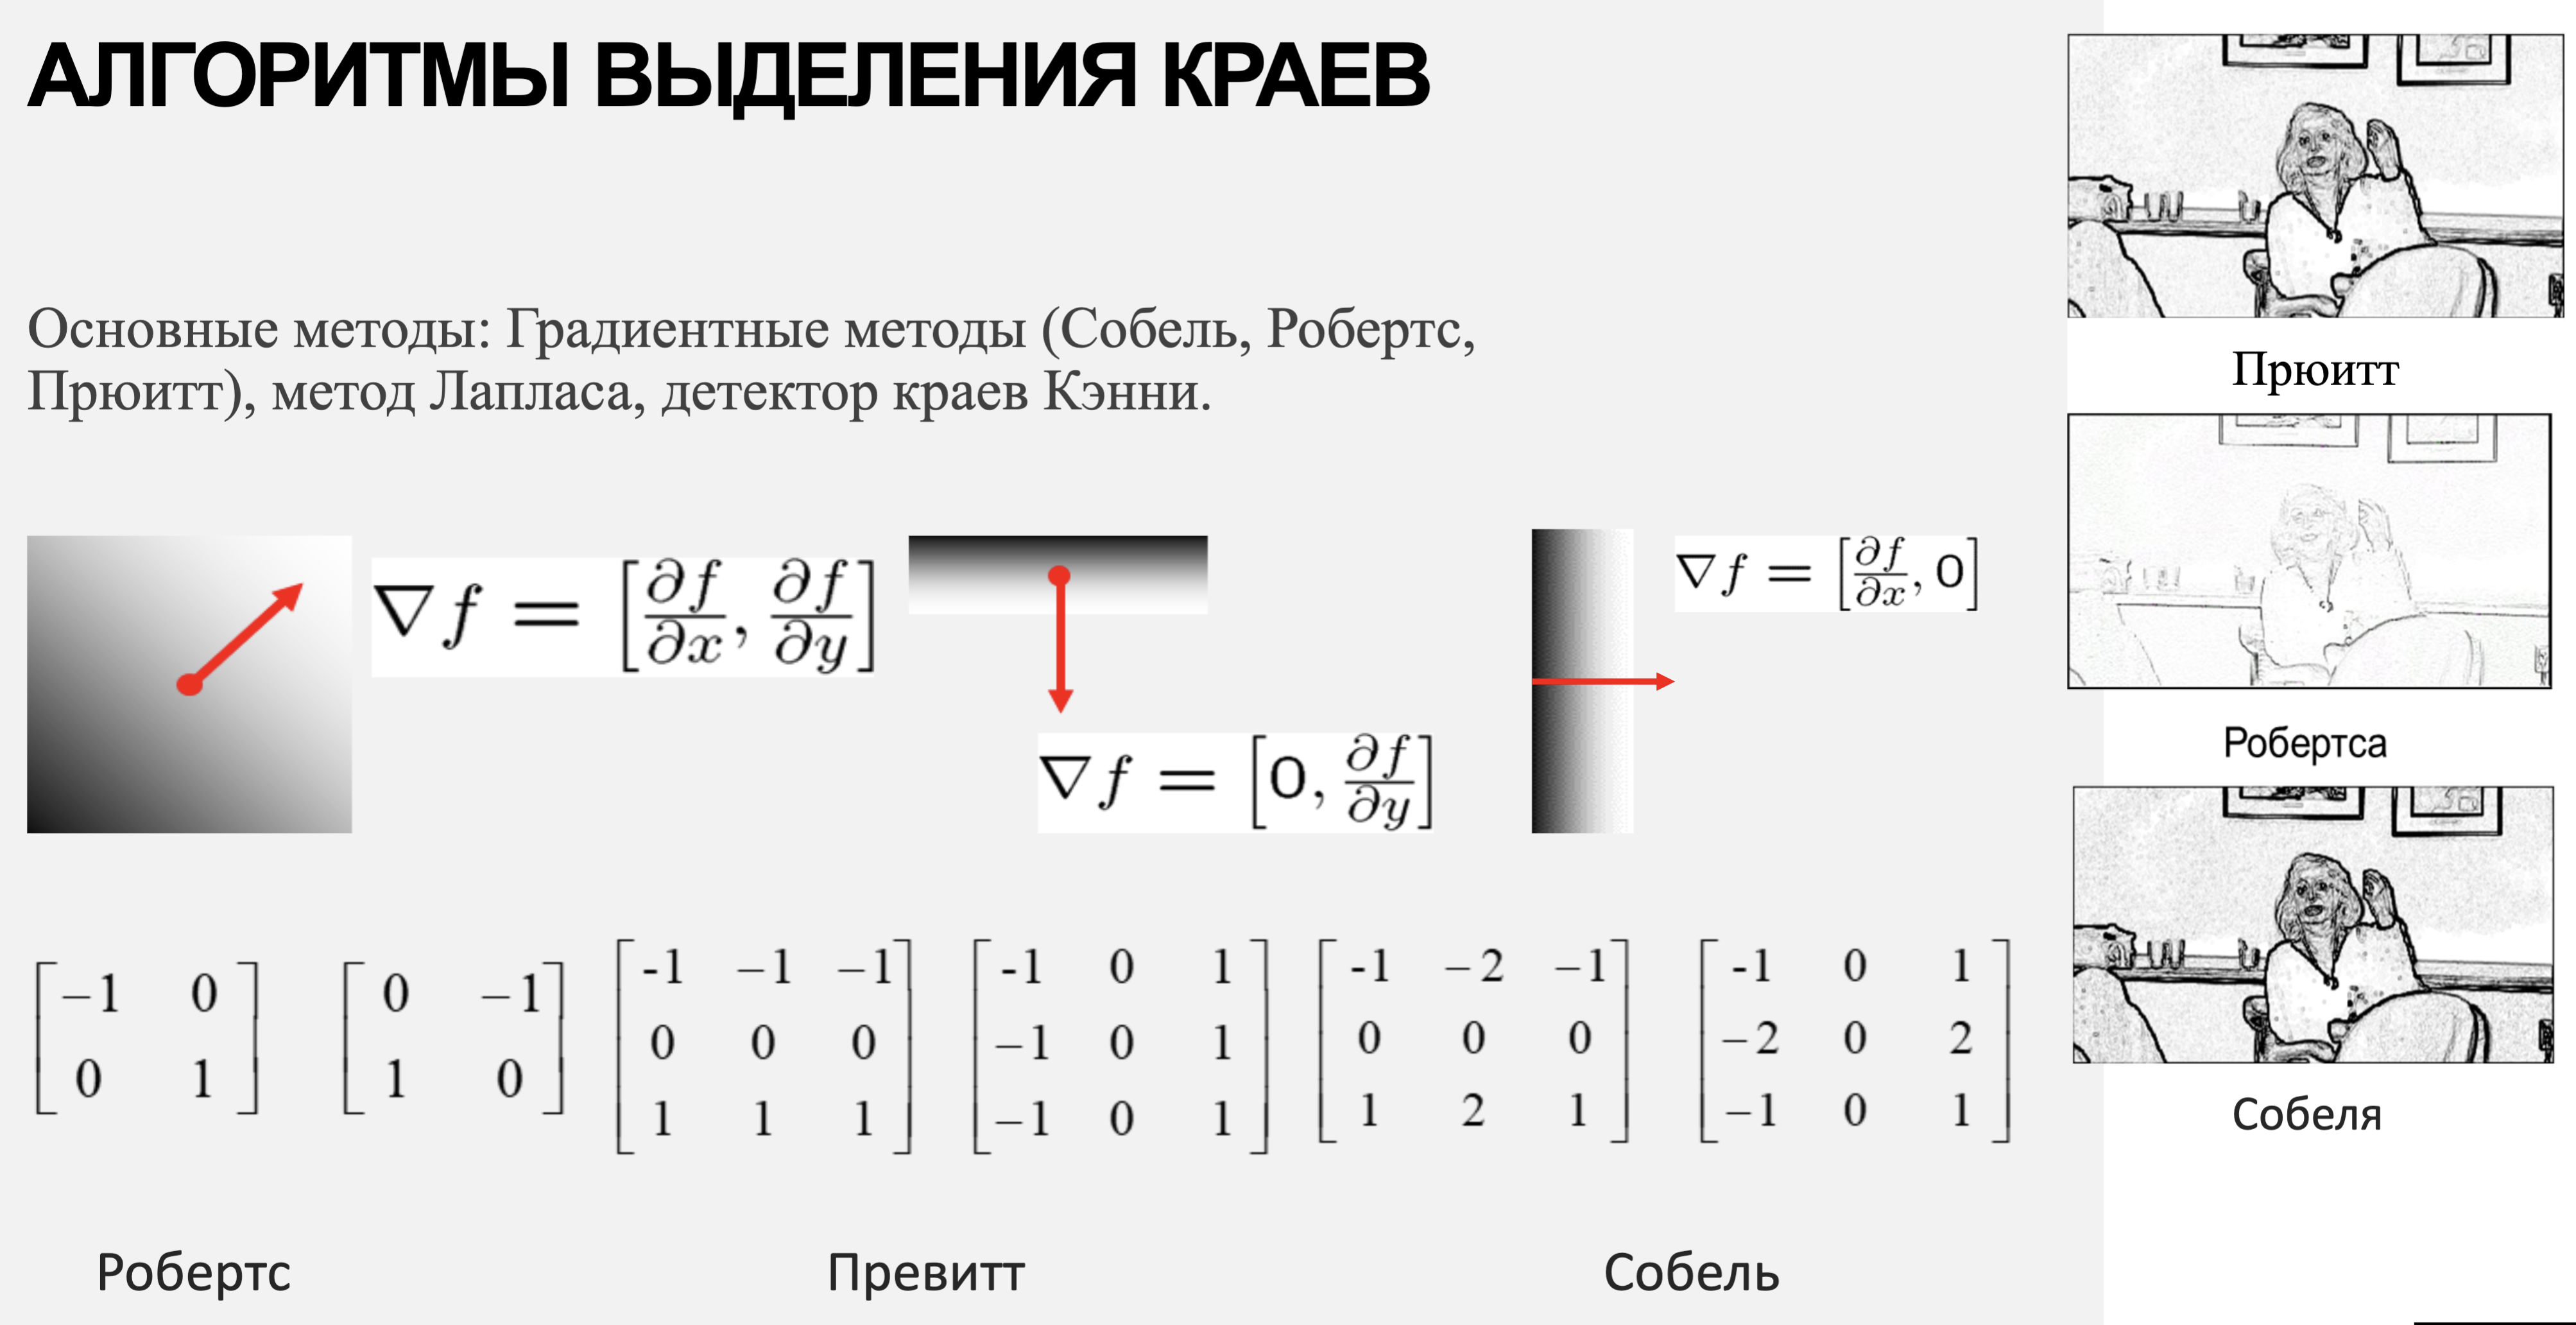

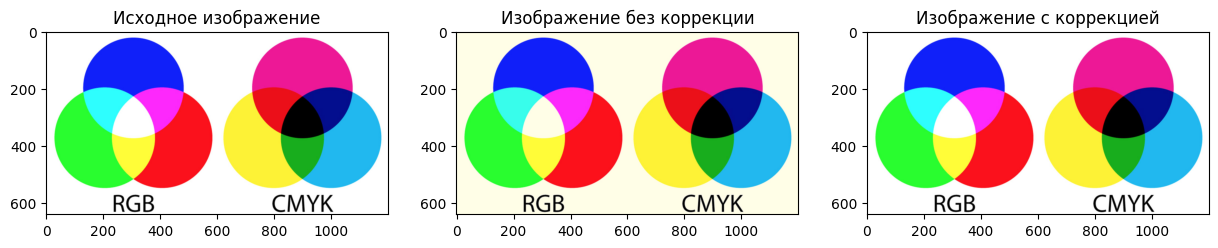

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('./data/image.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_xyz = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2XYZ)  # RGB > XYZ
image_xyz_rgb = cv2.cvtColor(image_xyz, cv2.COLOR_XYZ2RGB)  # XYZ > RGB

difference = image_rgb.astype(np.float32) - image_xyz_rgb.astype(np.float32)

corrected_image = image_xyz_rgb.astype(np.float32) + difference
corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Исходное изображение')

plt.subplot(1, 3, 2)
plt.imshow(image_xyz_rgb)
plt.title('Изображение без коррекции')

plt.subplot(1, 3, 3)
plt.imshow(corrected_image)
plt.title('Изображение с коррекцией')

plt.show()